In [1]:
from shap.maskers import Independent
from imldiff.adult.loader import load_data
from imldiff.adult.models import XGBoostModel
from imldiff.adult.explainers import SHAPExplainer
from imldiff.util import printmd
import shap
import numpy as np
%matplotlib inline

In [3]:
X, y, display_data = load_data()
feature_names = list(X.columns)
model = XGBoostModel()
model.load_or_train(X, y)

Loaded model: models/XGBoost.model


In [4]:
X_sample, y_sample, display_data_sample = load_data(n_samples=1000)
masker = Independent(X_sample, max_samples=100)

In [5]:
permutation_explainer = shap.Explainer(model.predict_log_odds, masker, algorithm='permutation')
permutation_explainer_shap_values = permutation_explainer(X_sample)
permutation_explainer_shap_values.display_data = display_data_sample

Permutation explainer: 1001it [00:34, 21.89it/s]                         


In [6]:
tree_explainer = shap.Explainer(model.model, masker, algorithm='tree')
tree_explainer_shap_values = tree_explainer(X_sample)
tree_explainer_shap_values.display_data = display_data_sample

In [7]:
exact_explainer = shap.Explainer(model.predict_log_odds, masker, algorithm='exact')
exact_explainer_shap_values = exact_explainer(X_sample)
exact_explainer_shap_values.display_data = display_data_sample

Exact explainer: 1001it [02:21,  6.68it/s]                          


In [8]:
explainers = [
    SHAPExplainer('Permutation'),
    SHAPExplainer('Tree'),
    SHAPExplainer('Exact')]
explainers[0].shap_values = permutation_explainer_shap_values
explainers[1].shap_values = tree_explainer_shap_values
explainers[2].shap_values = exact_explainer_shap_values
last_explainer = explainers[-1]

In [9]:
def scatter_plot(feature_name):
    printmd(f'### {feature_name}')
    for explainer in explainers:
        shap.plots.scatter(explainer.shap_values[:, feature_name], color=explainer.shap_values, title=explainer.identifier)

### Age

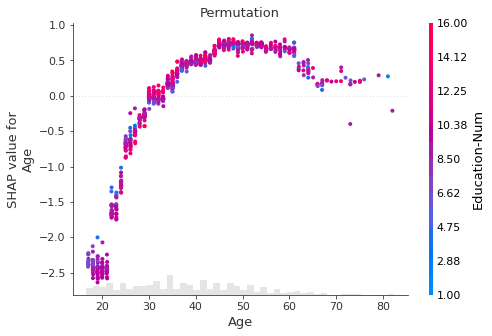

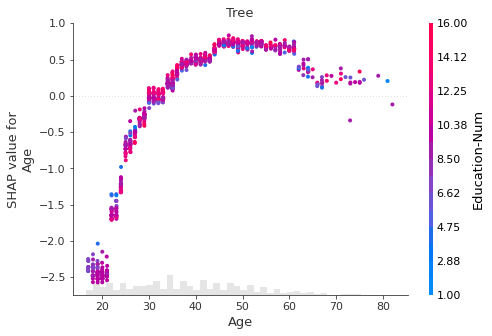

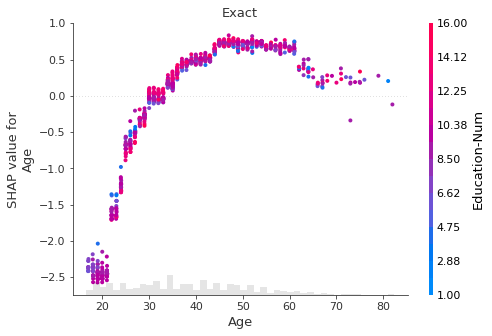

In [10]:
scatter_plot('Age')

The plots look pretty much alike, furthermore the feature with the biggest interactions is the same for each.

### Workclass

Passing the fontdict parameter of _set_ticklabels() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.


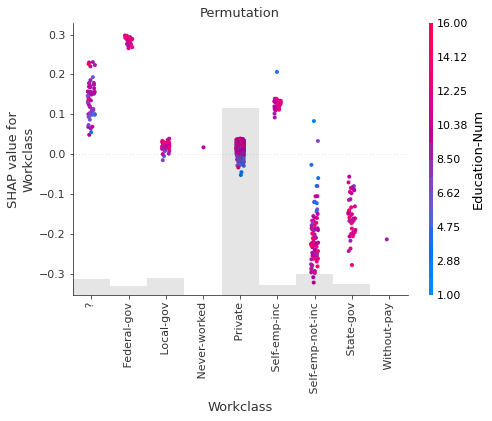

Passing the fontdict parameter of _set_ticklabels() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.


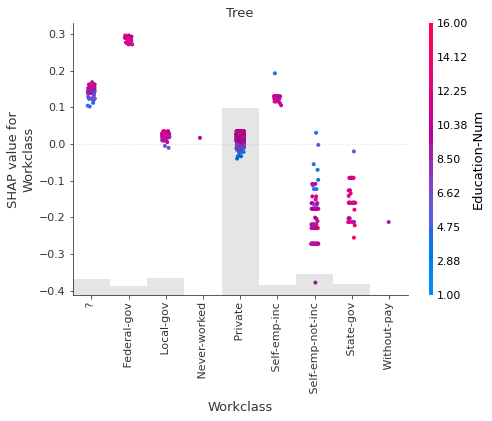

Passing the fontdict parameter of _set_ticklabels() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.


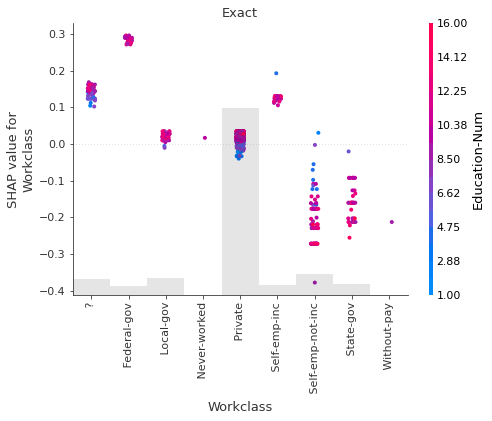

In [11]:
scatter_plot('Workclass')

The null-values seem to concentrate more in the plot of the tree-based explainer.

### Education-Num

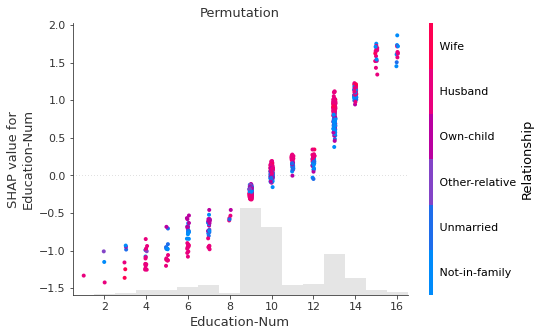

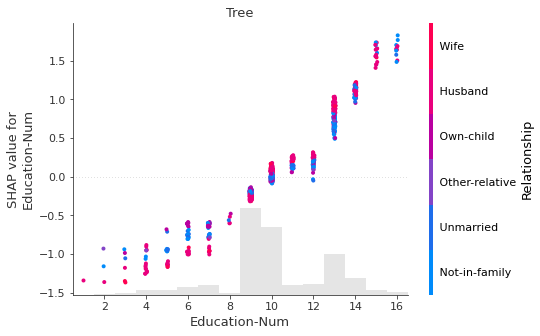

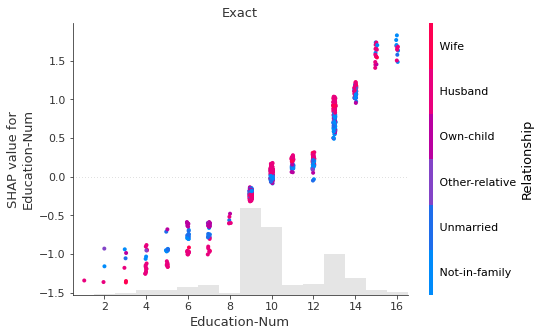

In [12]:
scatter_plot('Education-Num')

### Marital Status

Passing the fontdict parameter of _set_ticklabels() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.


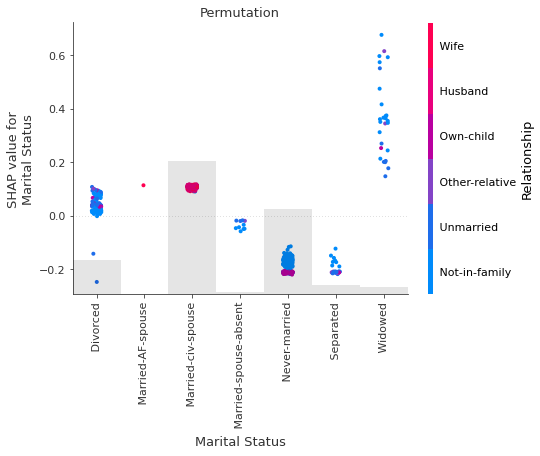

Passing the fontdict parameter of _set_ticklabels() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.


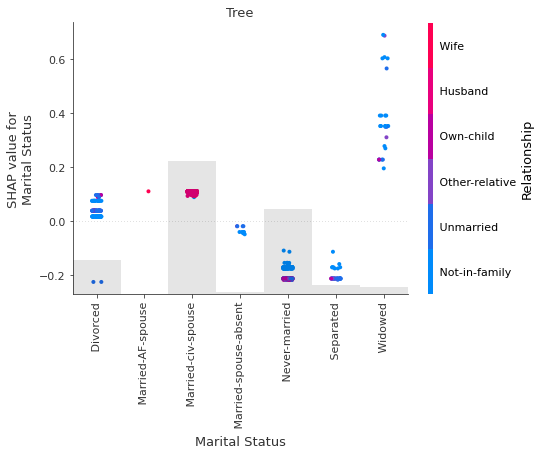

Passing the fontdict parameter of _set_ticklabels() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.


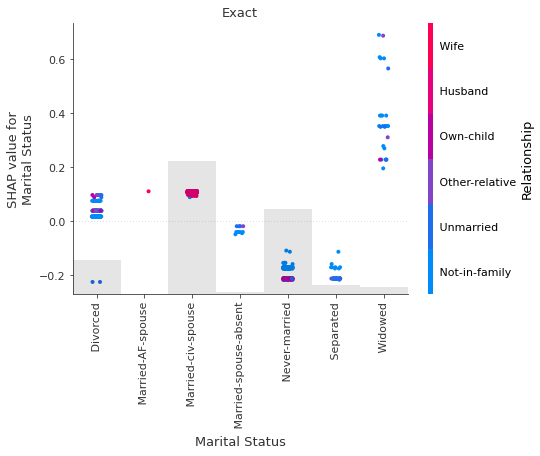

In [13]:
scatter_plot('Marital Status')

In the permutation-based explainer, the categorical feature steps are not shown clearly because of higher variance.

### Occupation

Passing the fontdict parameter of _set_ticklabels() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.


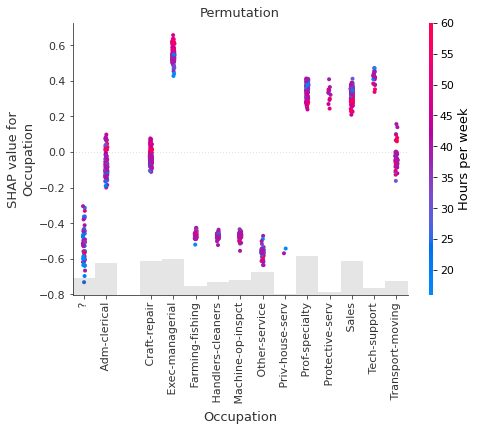

Passing the fontdict parameter of _set_ticklabels() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.


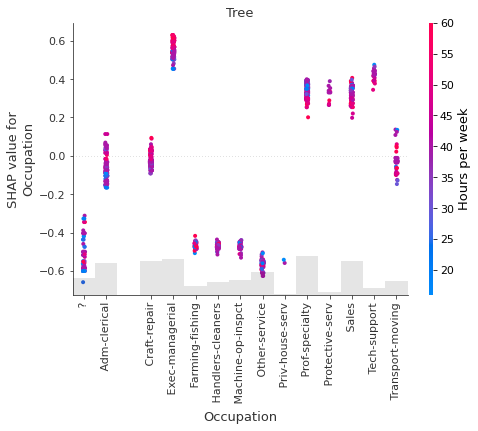

Passing the fontdict parameter of _set_ticklabels() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.


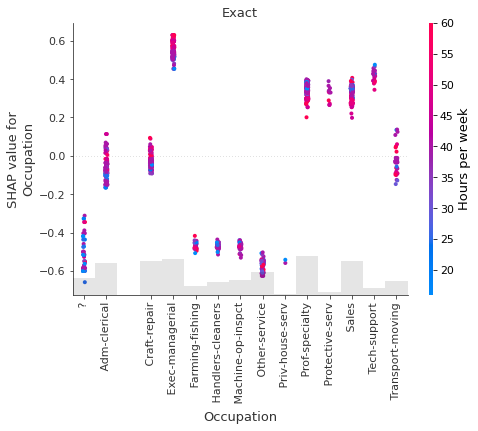

In [14]:
scatter_plot('Occupation')

### Relationship

Passing the fontdict parameter of _set_ticklabels() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.


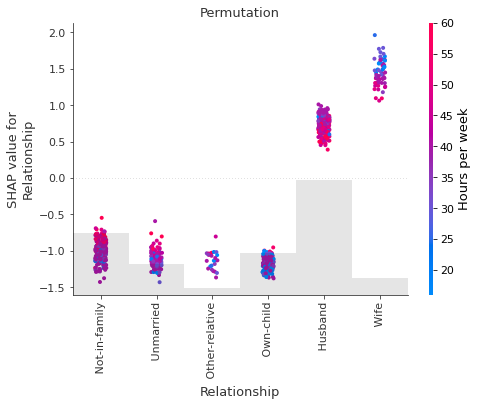

Passing the fontdict parameter of _set_ticklabels() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.


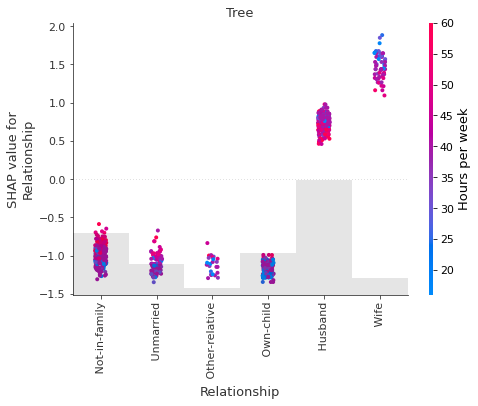

Passing the fontdict parameter of _set_ticklabels() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.


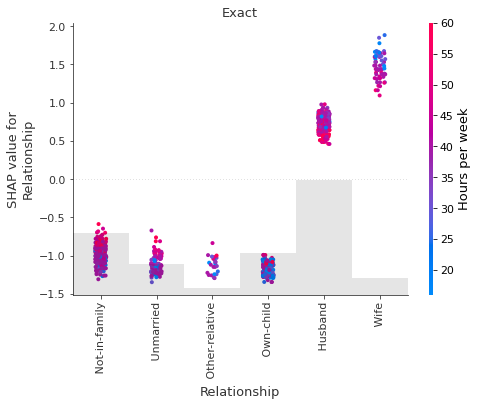

In [15]:
scatter_plot('Relationship')

### Race

Passing the fontdict parameter of _set_ticklabels() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.


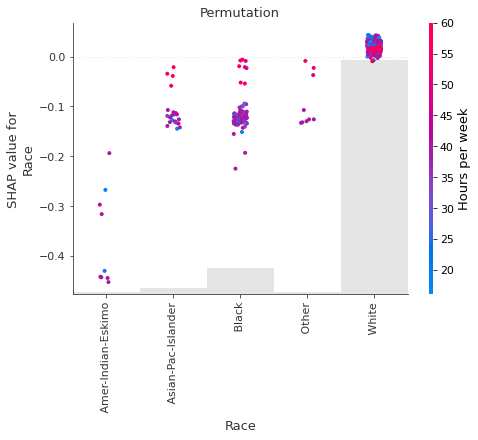

Passing the fontdict parameter of _set_ticklabels() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.


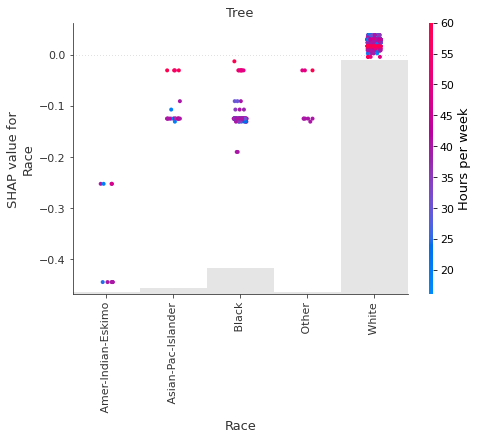

Passing the fontdict parameter of _set_ticklabels() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.


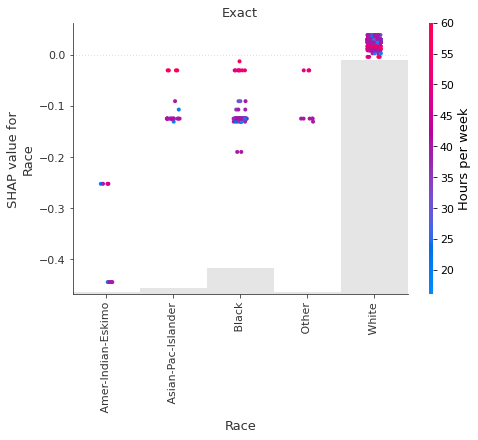

In [16]:
scatter_plot('Race')

### Sex

Passing the fontdict parameter of _set_ticklabels() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.


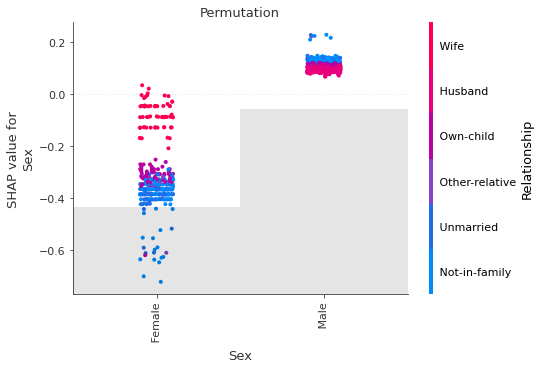

Passing the fontdict parameter of _set_ticklabels() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.


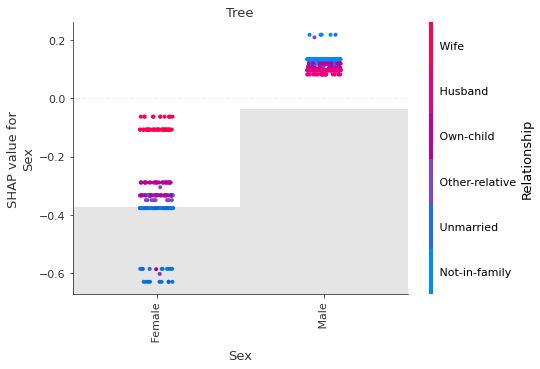

Passing the fontdict parameter of _set_ticklabels() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.


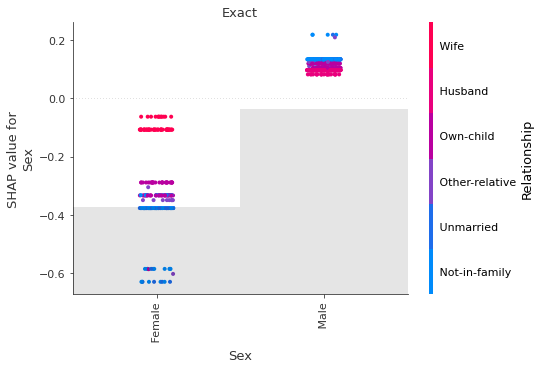

In [17]:
scatter_plot('Sex')

Here is the difference the biggest. The permutation based explainer has a much higher variability, which obfuscates the steps the categorical features provide. It doesn't get better when using `max_samples=1000` for the `Independent` masker.

### Capital Gain

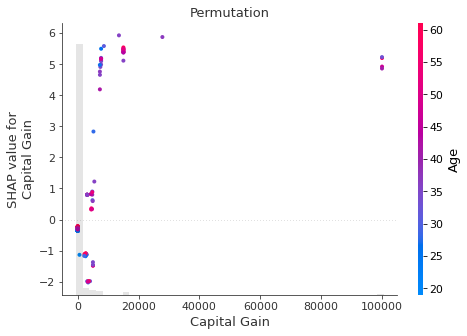

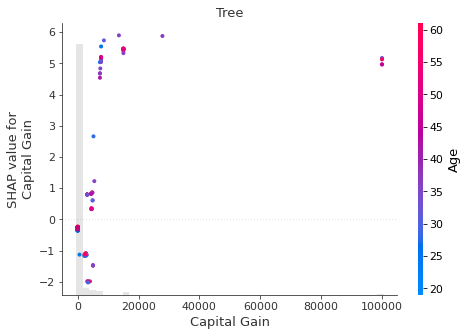

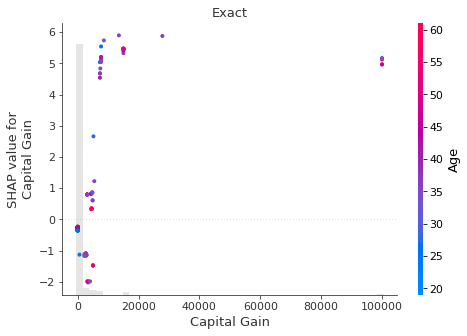

In [18]:
scatter_plot('Capital Gain')

### Capital Loss

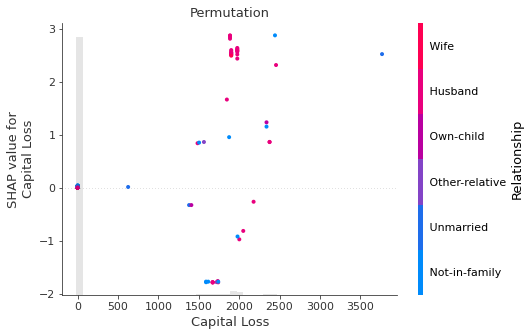

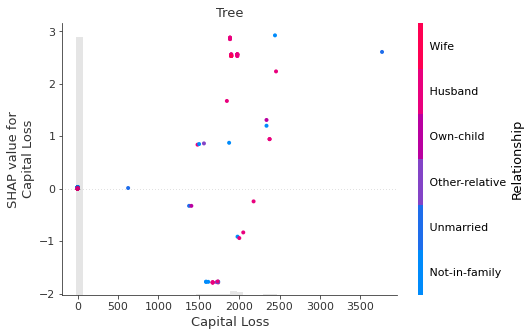

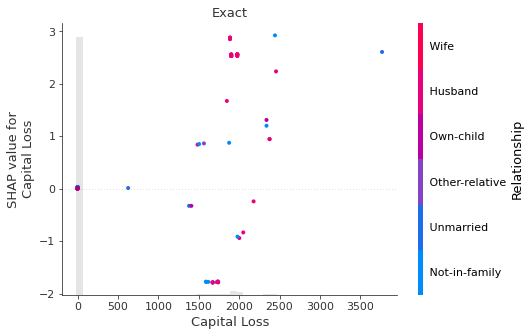

In [19]:
scatter_plot('Capital Loss')

### Hours per week

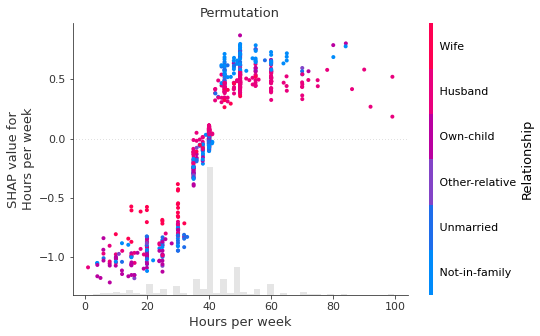

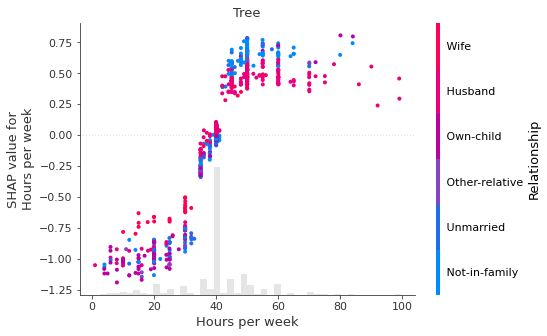

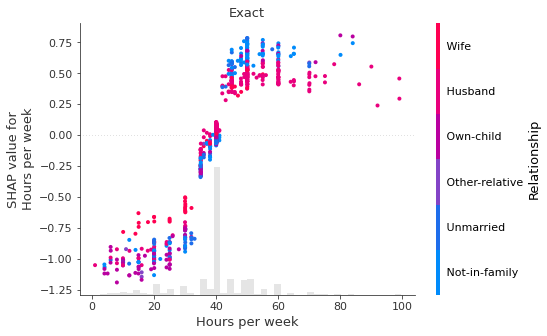

In [20]:
scatter_plot('Hours per week')

### Country

Passing the fontdict parameter of _set_ticklabels() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.


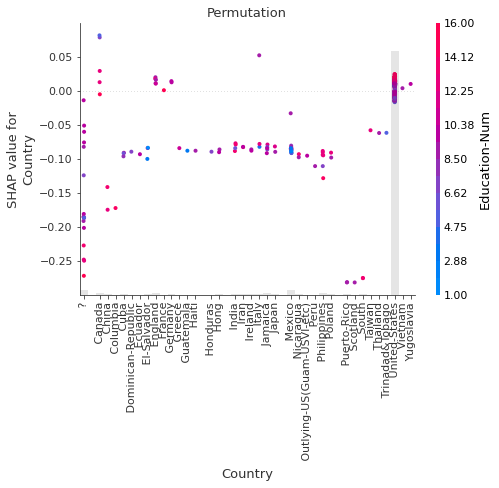

Passing the fontdict parameter of _set_ticklabels() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.


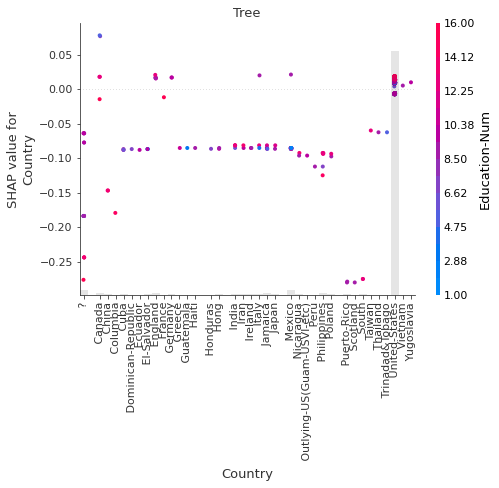

Passing the fontdict parameter of _set_ticklabels() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.


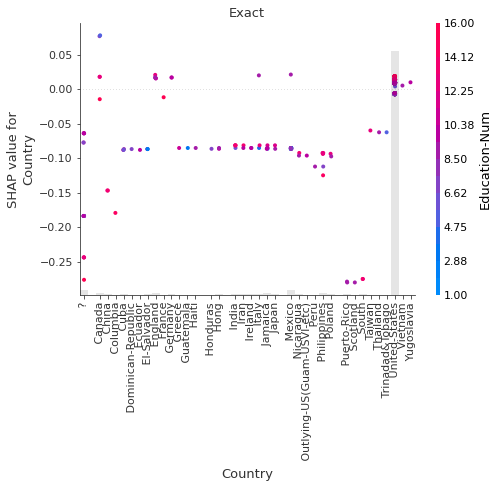

In [21]:
scatter_plot('Country')

### Permutation

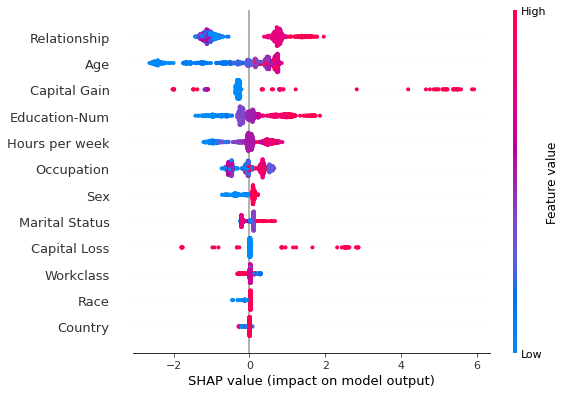

### Tree

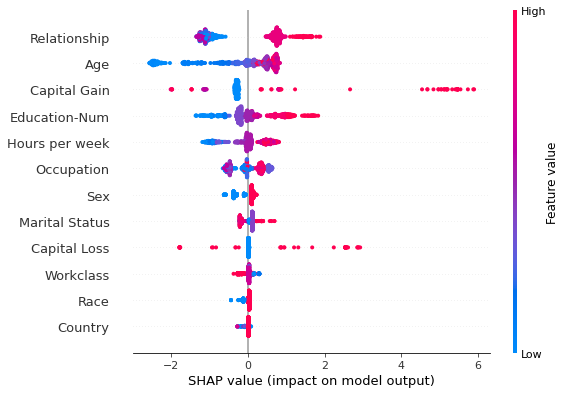

### Exact

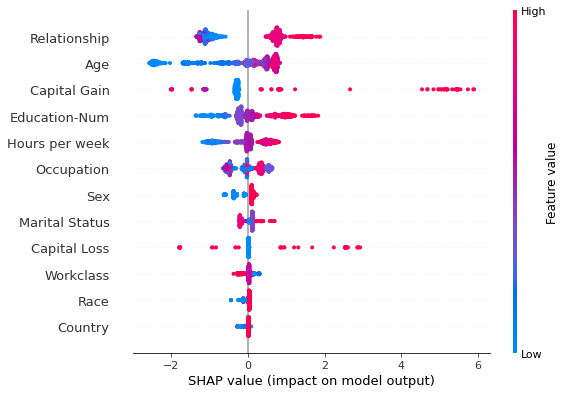

In [22]:
order = np.argsort(-explainers[-1].shap_values.abs.mean(0).values)
for explainer in explainers:
    printmd(f'### {explainer.identifier}')
    shap.plots.beeswarm(explainer.shap_values, order=order, max_display=len(feature_names))

In [23]:
shap.initjs()

In [24]:
last_plot = shap.plots.force(
    base_value=last_explainer.shap_values.abs.mean(0).base_values,
    shap_values=last_explainer.shap_values.values,
    features=last_explainer.shap_values.display_data,
    feature_names=feature_names,
    out_names=last_explainer.identifier)
ordering = list(map(lambda x: int(x['simIndex']), last_plot.data['explanations']))

In [25]:
def force_plot(explainer):
    printmd(f'### {explainer.identifier}')
    return shap.plots.force(
        base_value=explainer.shap_values.abs.mean(0).base_values,
        shap_values=explainer.shap_values.values,
        features=explainer.shap_values.display_data,
        feature_names=feature_names,
        out_names=explainer.identifier,
        ordering_keys=ordering)

In [26]:
force_plot(explainers[0])

### Permutation

In [27]:
force_plot(explainers[1])

### Tree

In [28]:
force_plot(explainers[2])

### Exact

### Permutation

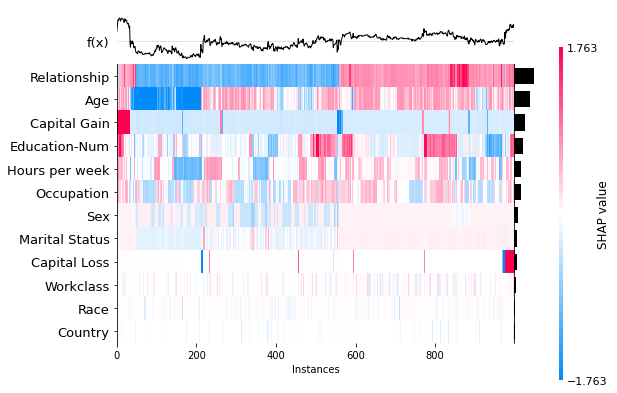

### Tree

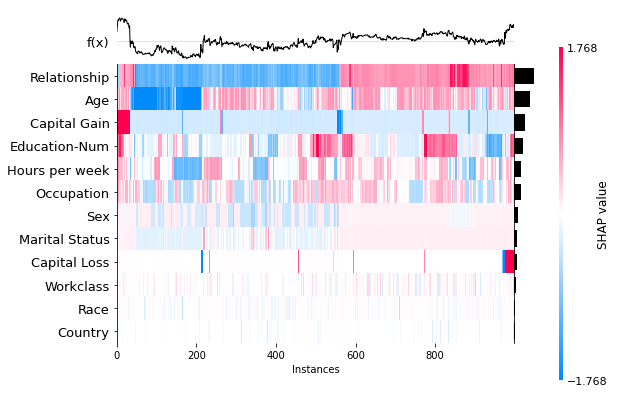

### Exact

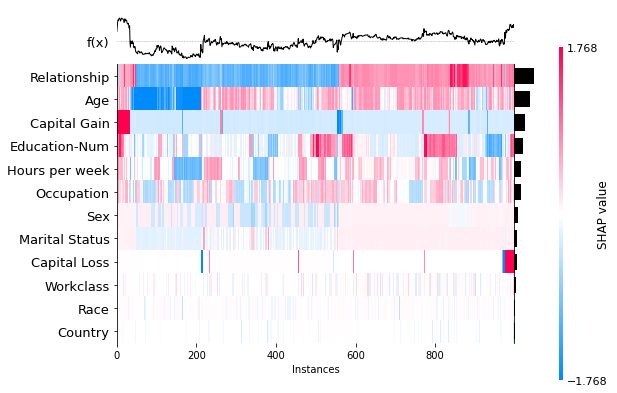

In [29]:
instance_order = last_explainer.shap_values.hclust()
feature_order = np.argsort(-last_explainer.shap_values.abs.mean(0).values)
for explainer in explainers:
    printmd(f'### {explainer.identifier}')
    shap.plots.heatmap(explainer.shap_values, instance_order=instance_order, feature_order=feature_order, max_display=len(feature_names))